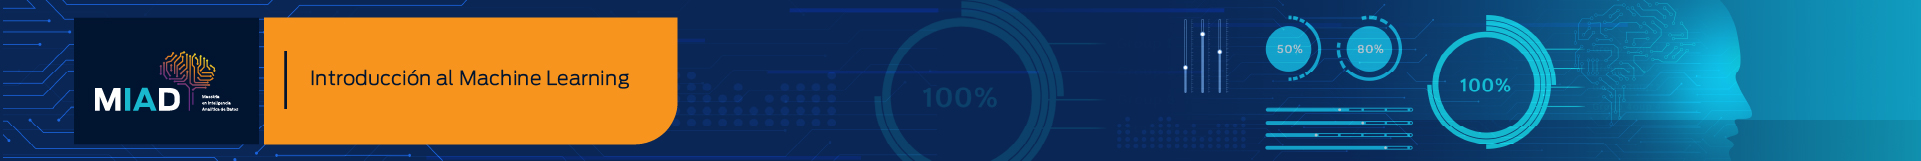

# Introducción al Machine Learning - Semana 3
## Caso: Implementación de modelos de clasificación lineales

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de linear discriminant analysis, quadratic discriminant analysis, naive bayes classifier y regresión logística.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo LDA: Se estima el modelo usando LDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo QDA: Se estima el modelo usando QDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo NBC: Se estima el modelo usando NBC, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de regresión logística: Se estima el modelo usando regresión logística, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "SMarket", la cual contiene 8 variables predictivas sobre el índice financiero S&P500 y 1250 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará al día siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-smarket

In [9]:
#librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


In [10]:
#lectura informacion

data_dir = "data\dataset-18213.csv"

data = pd.read_csv(data_dir)

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [11]:
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [12]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [13]:
XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="Direction"), data["Direction"], test_size=0.3, random_state=0)
del(data)


In [14]:
XTrain.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,2002.972571,-0.026193,-0.022769,0.002855,0.007762,-0.024617,1.477637,0.013911
std,1.413138,1.146049,1.124297,1.156340,1.133175,1.107747,0.355963,1.150938
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.922000,0.410300,-4.922000
25%,2002.000000,-0.666500,-0.645000,-0.652000,-0.645000,-0.640000,1.264550,-0.637000
50%,2003.000000,0.032000,0.039000,0.022000,0.046000,0.016000,1.418100,0.046000
75%,2004.000000,0.585000,0.593000,0.596500,0.620500,0.561000,1.633150,0.598500
max,2005.000000,5.733000,5.408000,5.733000,5.408000,5.733000,2.792030,5.733000


In [15]:
gr = pd.DataFrame(yTrain)
gr["ones"] = 1
gr = gr.groupby("Direction").count()
gr["pct"] = gr["ones"]/ gr["ones"].sum()
gr

,ones,pct
Direction,,
Down,418,0.477714
Up,457,0.522286


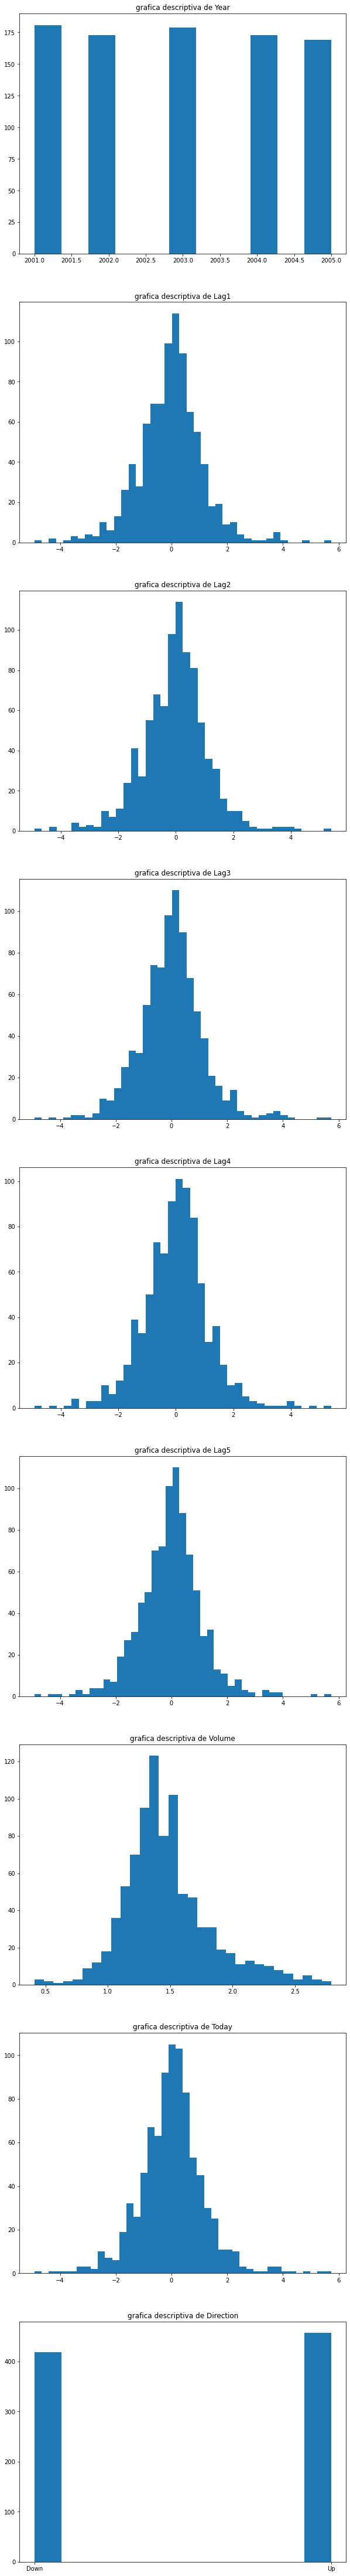

In [16]:
desc_df = pd.concat([XTrain,yTrain],axis=1)

fig ,axes = plt.subplots(nrows=len(desc_df.columns),ncols=1, figsize=(10, 80))

axs = axes.flatten()

for i, c in enumerate(desc_df):
    
    axs[i].hist(desc_df[c], bins='auto')
    axs[i].set_title("grafica descriptiva de {}".format(c))

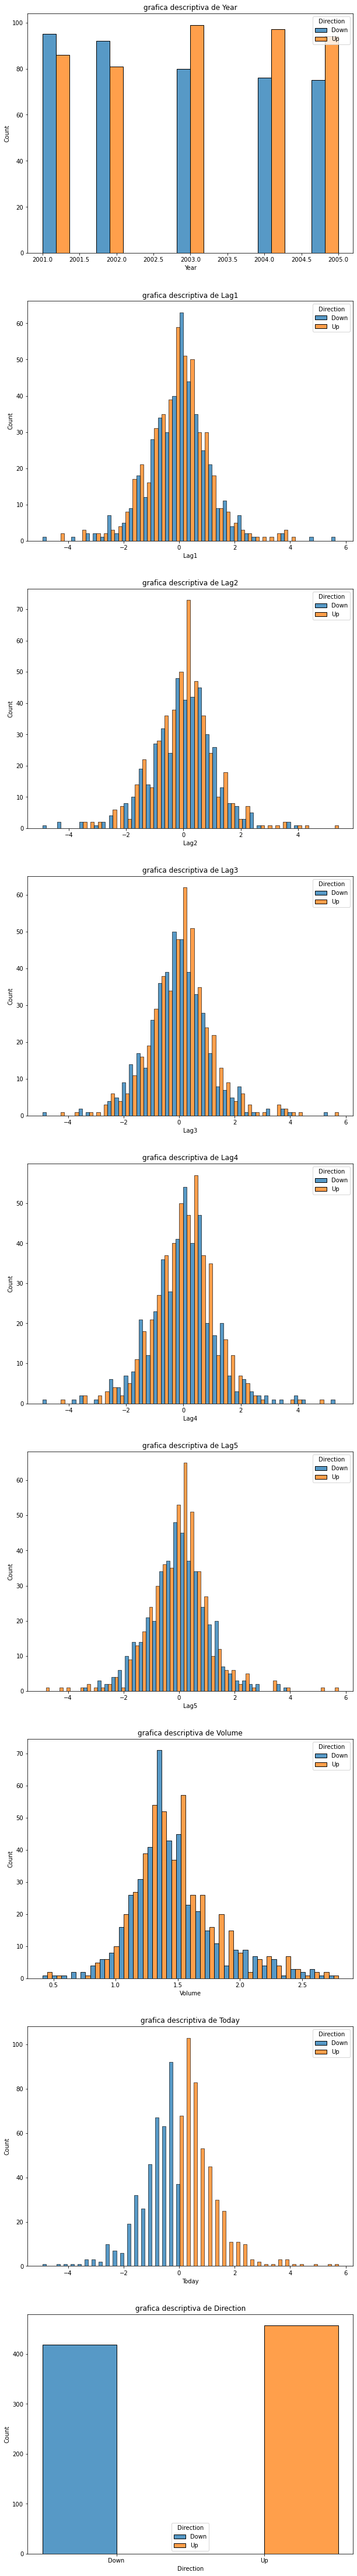

In [17]:
desc_df = pd.concat([XTrain,yTrain],axis=1)

fig ,axes = plt.subplots(nrows=len(desc_df.columns),ncols=1, figsize=(10, 80))

axs = axes.flatten()

for i, c in enumerate(desc_df):
    
    #axs[i].hist(desc_df[c], bins='auto', hue = "Direction")

    sns.histplot(data = desc_df, x=c, hue="Direction", ax=axs[i],multiple="dodge")
    axs[i].set_title("grafica descriptiva de {}".format(c))

In [18]:
# la variable Direction es calculada desde Today por esto tienen el comportamiento que se evidencia en las graficas y por tal motivo debe eliminarse la variable Today


XTrain = XTrain.drop(columns=["Today"])
XTest = XTest.drop(columns=["Today"])

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

### 2. Estimación modelo LDA (20 puntos)
Estimen un modelo predictivo con LDA usando la muestra de entrenamiento, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [19]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

clfLDA = LinearDiscriminantAnalysis()

#para este modelo en particular no se tendra en cuenta la variable year ya que no tiene una distribucion normal y sus valores son mas discretos que continuos para el volumen de datos

XTrainLDA = XTrain.drop(columns=["Year"])
XTestLDA = XTest.drop(columns=["Year"])

clfLDA.fit(XTrainLDA, yTrain)

prediccionesLDA=clfLDA.predict(XTestLDA)
prediccionesProbLDA=clfLDA.predict_proba(XTestLDA)


errorLDA=0
for i in range(0,len(yTest)):
    if(yTest.iloc[i]!=prediccionesLDA[i]):
        errorLDA+=1/len(yTest)
        
print('El error de clasificación para LDA en la muestra de test es:')
print(errorLDA)

El error de clasificación para LDA en la muestra de test es:
0.495999999999999


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

print(confusion_matrix(y_true=yTest, y_pred=prediccionesLDA))
accuracyLDA=accuracy_score(y_true=yTest, y_pred=prediccionesLDA)
print(accuracyLDA)
precisionRegLog= precision_score(y_true=yTest.values, y_pred=prediccionesLDA, pos_label = "Up")
print(precisionRegLog)

[[ 48 136]
 [ 50 141]]
0.504
0.5090252707581228


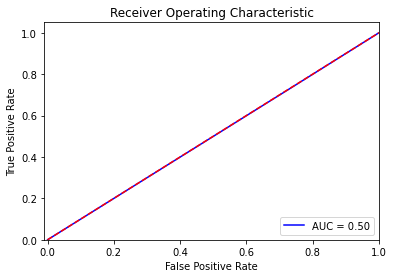

In [71]:
fpr, tpr, thresholds = roc_curve((yTest == "Up").astype(int), (prediccionesLDA == "Up").astype(int))
AUCRegLog=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Estimación modelo QDA (20 puntos)
Estimen un modelo predictivo usando QDA, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [89]:
XTrain.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object')

In [85]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####


#para este modelo en particular no se tendra en cuenta la variable year ya que no tiene una distribucion normal y sus valores son mas discretos que continuos para el volumen de datos

XTrainQDA = XTrain.drop(columns=["Year"])
XTestQDA = XTest.drop(columns=["Year"])


clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrainQDA, yTrain)

prediccionesQDA=clfQDA.predict(XTestQDA)
prediccionesProbQDA=clfQDA.predict_proba(XTestQDA)

errorQDA=0
for i in range(0,len(yTest)):
    if(yTest.iloc[i]!=prediccionesQDA[i]):
        errorQDA+=1/len(yTest)
        
print('El error de clasificación para QDA en la muestra de test es:')
print(errorQDA)


El error de clasificación para QDA en la muestra de test es:
0.5119999999999991


In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

print(confusion_matrix(y_true=yTest, y_pred=prediccionesQDA))
accuracyLDA=accuracy_score(y_true=yTest, y_pred=prediccionesQDA)
print(accuracyLDA)
precisionRegLog= precision_score(y_true=yTest.values, y_pred=prediccionesQDA, pos_label = "Up")
print(precisionRegLog)

[[ 51 133]
 [ 59 132]]
0.488
0.4981132075471698


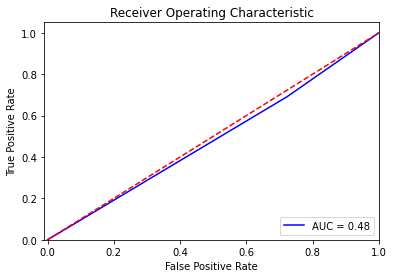

In [88]:
fpr, tpr, thresholds = roc_curve((yTest == "Up").astype(int), (prediccionesQDA == "Up").astype(int))
AUCRegLog=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

### 4. Estimación modelo NBC (20 puntos)
Predigan usando Naive Bayes Classifier y evalúen su poder predictivo en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Estimación modelo regresión logística (20 puntos)
Predigan usando un modelo de regresión logística y evalúen en test. Concluyan sobre el poder predictivo del modelo estimado.

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 6)